**The problem**
- To identify factors that predict future user adoption based on the given datasets.

**The approach**
1. Data exploration: understand, analyze, and clean that datasets.
2. Feature engineering: Analyzing and extracting relevent features, defining the target variable
3. Model selection
4. Training and evaluating models
5. Findings:Feature importance, Interpretation and insights

## Data Exploration

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data

df1 = pd.read_csv('takehome_users.csv', encoding='latin1') # Data exploration

df2 = pd.read_csv('takehome_user_engagement.csv') # Target variable extraction

In [3]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
# correcting the dtypes
df1["creation_time"] = pd.to_datetime(df1["creation_time"], format= ("%Y-%m-%d %H:%M:%S"))
df1["last_session_creation_time"] = pd.to_datetime(df1["last_session_creation_time"], unit='s')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
df2["time_stamp"] = pd.to_datetime(df2["time_stamp"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# filling null values
df1['last_session_creation_time'] = df1['last_session_creation_time'].fillna(df1['creation_time'])
df1.invited_by_user_id.fillna(0, inplace=True)

df1.isna().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

Now for some EDA

In [8]:
# Most popular organization id in the dataset.

print("Number of unique organizations in the dataset is {} and the 5 most popular organization id are: \n{}.".format(df1['org_id'].nunique(), df1['org_id'].value_counts().head()))

Number of unique organizations in the dataset is 417 and the 5 most popular organization id are: 
0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64.


In [9]:
# Users with the most invites
print('Users with the most invites:')
df1['invited_by_user_id'].value_counts(ascending=False).iloc[1:6]

Users with the most invites:


10741.0    13
2527.0     12
1525.0     11
2308.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

In [10]:
# opted into mailing list

df1.groupby("opted_in_to_mailing_list")['object_id'].count()

opted_in_to_mailing_list
0    9006
1    2994
Name: object_id, dtype: int64

In [11]:
df1.groupby("enabled_for_marketing_drip")['object_id'].count()

enabled_for_marketing_drip
0    10208
1     1792
Name: object_id, dtype: int64

For any further analysis, we will need the target variable

## Feature Engineering

In [12]:
# group by 'user_id'
df2_grouped = df2.groupby('user_id')['visited'].sum().reset_index()
df2_grouped.head()


,user_id,visited
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1


In [13]:
# Adding visit counts as feature to df1
df1 = df1.merge(df2_grouped, left_on='object_id', right_on='user_id', how='left', ).drop(columns="user_id")
df1.fillna(1, inplace=True)
df1.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0


In [14]:
# drop users with less than three visits
df2_grouped = df2_grouped[df2_grouped['visited'] >= 3]

In [15]:
active_users = list(df2_grouped.user_id)

# Get only active users and ensure they are in chronological order
df2_cleaned = df2[df2['user_id'].isin(active_users)]
df2_cleaned = df2_cleaned.sort_values(by = ['user_id', 'time_stamp'])
df2_cleaned.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [16]:
df2_cleaned.drop('visited', axis=1, inplace=True)

In [17]:
# Shift the time_stamp of each users logins by 2 ensuring each range includes 3 logins.
df2_cleaned['shifted'] = pd.to_datetime(df2_cleaned.groupby('user_id')['time_stamp'].shift(2))
df2_cleaned.head()

,time_stamp,user_id,shifted
1,2013-11-15 03:45:04,2,NaT
2,2013-11-29 03:45:04,2,NaT
3,2013-12-09 03:45:04,2,2013-11-15 03:45:04
4,2013-12-25 03:45:04,2,2013-11-29 03:45:04
5,2013-12-31 03:45:04,2,2013-12-09 03:45:04


In [18]:
# create new feature span to calculate the number of days between the 3 logins.

df2_cleaned['span'] = (df2_cleaned['time_stamp'] - df2_cleaned['shifted']).dt.days
df2_cleaned.head()

,time_stamp,user_id,shifted,span
1,2013-11-15 03:45:04,2,NaT,NaN
2,2013-11-29 03:45:04,2,NaT,NaN
3,2013-12-09 03:45:04,2,2013-11-15 03:45:04,24.0
4,2013-12-25 03:45:04,2,2013-11-29 03:45:04,26.0
5,2013-12-31 03:45:04,2,2013-12-09 03:45:04,22.0


In [19]:
# dropping the first two entries for each user which are no longer needed.

df2_cleaned.dropna(inplace=True)

In [20]:
# subsetting by spans that are a week or less

df2_final = df2_cleaned[df2_cleaned['span'] <= 7].drop_duplicates(subset=['user_id'])
df2_final.head()

,time_stamp,user_id,shifted,span
9,2014-02-09 03:45:04,2,2014-02-03 03:45:04,6.0
24,2013-02-06 22:08:03,10,2013-01-30 22:08:03,7.0
312,2014-03-13 11:46:38,20,2014-03-11 11:46:38,2.0
331,2014-03-23 06:29:09,33,2014-03-17 06:29:09,6.0
353,2012-12-25 19:05:07,42,2012-12-18 19:05:07,7.0


In [21]:
# defining adopted users and creating a new label in original dataframe

adopted_users = df2_final["user_id"].unique()
df1["adopted_user"] = df1["object_id"].isin(adopted_users).astype(int)
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,0


In [22]:
# We will need to drop the date entries before building the model, so I will create a new feature 'account_age' to retain the information.

df1['account_age'] = df1['last_session_creation_time']-df1['creation_time']
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted_user,account_age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14.0,1,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,0,5 days


Additional analysis

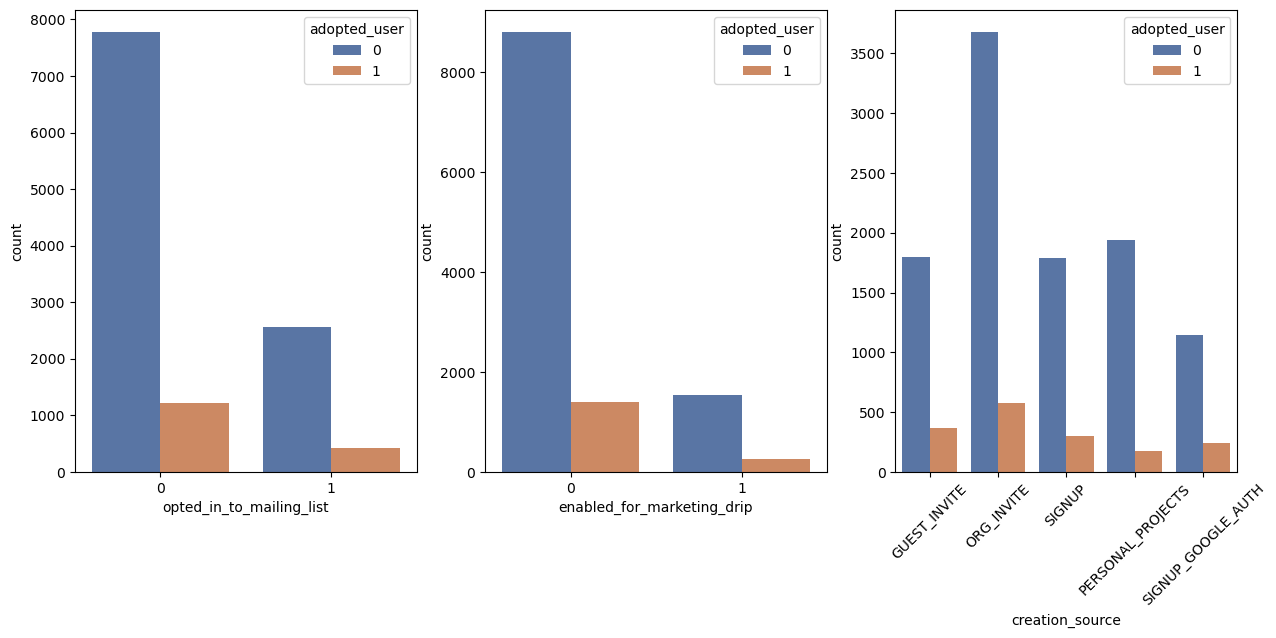

In [23]:
import seaborn as sns
fig, ax = plt.subplots(1,3, figsize=(15,6))

sns.countplot(x='opted_in_to_mailing_list',hue='adopted_user',data=df1, palette='deep', ax=ax[0])
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=df1, palette='deep', ax=ax[1])
sns.countplot(x='creation_source', data=df1, hue='adopted_user', palette='deep', ax=ax[2])
ax[2].xaxis.set_ticklabels(ax[2].xaxis.get_ticklabels(), rotation=45)
plt.show()

## Model selection


In [24]:
features = ["creation_source","opted_in_to_mailing_list", "enabled_for_marketing_drip", "org_id", "account_age", "visited"]
X = df1[features]
y = df1["adopted_user"]

In [25]:
X["account_age"] = X["account_age"].dt.days

X = pd.get_dummies(data=X, columns=["creation_source"])

X.head()

C:\Users\Nizar\AppData\Local\Temp\ipykernel_16984\696260035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["account_age"] = X["account_age"].dt.days


,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,account_age,visited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,0,1.0,1,0,0,0,0
1,0,0,1,136,14.0,0,1,0,0,0
2,0,0,94,0,1.0,0,1,0,0,0
3,0,0,1,1,1.0,1,0,0,0,0
4,0,0,193,5,1.0,1,0,0,0,0


In [26]:
y.value_counts()

0    10344
1     1656
Name: adopted_user, dtype: int64

Due to the weight imbalance, we can use the RandomForest classifiers "class_weight" parameter. When set to "balanced_subsample" the algorithm will balance the class weights during the bootstrap sampling of the data for building each decision tree.
This means that the algorithm will give more importance to the minority class samples, which can help improve the model's performance when dealing with imbalanced datasets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Train the random forest model using class_weight = 'balanced_subsample'
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

rfc = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, n_jobs=-1)
rfc_cv = cross_validate(rfc, X_train, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="recall")

5 fold CV indicates little variation in accuracy score suggesting model is not suffering from significant over-fitting.

## Training and evaluating model

In [29]:
# Check the model performance
print(f"{rfc_cv['test_score'].mean():.3f} +/- {rfc_cv['test_score'].std():.3f}")

0.938 +/- 0.017


In [30]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9875

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2063
           1       0.97      0.94      0.95       337

    accuracy                           0.99      2400
   macro avg       0.98      0.97      0.97      2400
weighted avg       0.99      0.99      0.99      2400

Confusion Matrix: 
 [[2053   10]
 [  20  317]]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Model Evaluation Report:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")

Model Evaluation Report:
Accuracy: 0.9875, Precision: 0.9694, Recall: 0.9407, F1 Score: 0.9548, AUC: 0.9679


With the features used, the model performed impressively on the test data.

## Findings

In [33]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = rfc.feature_importances_
feature_importance = feature_importance.set_index(X.columns)

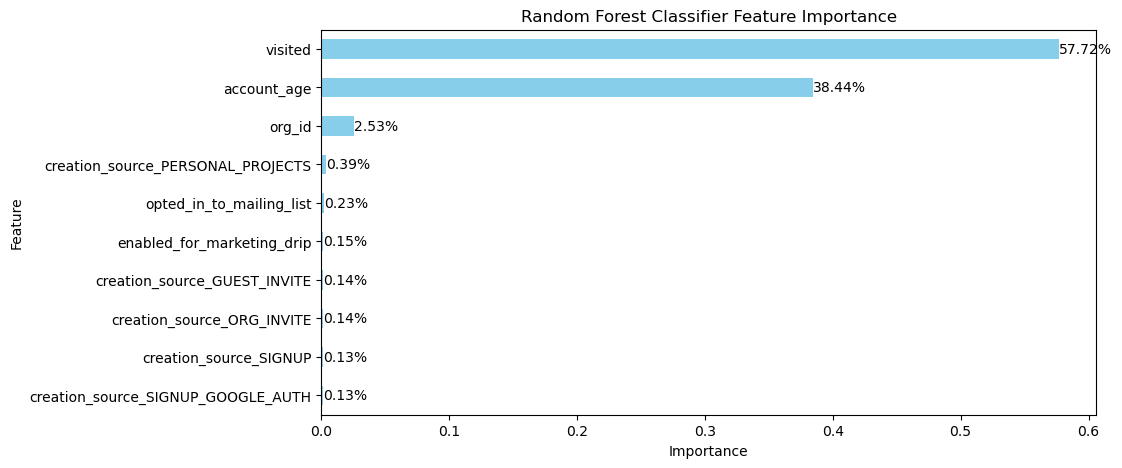

In [34]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top_features = feature_importance['feature'].nlargest(10)[::-1]
top_features.plot(kind='barh', color='skyblue')

for index, value in enumerate(top_features):
    plt.text(value, index, f'{value*100:.2f}%', ha='left',va='center')

plt.title('Random Forest Classifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Unsuprisingly, the model identified the number of visits (`visited`) and the number of days between the user's sign up date and most recent visit (`account_age`), as the most important features in predicting user adoption: **57.7%** and **38.4%**

While they are essential features for predicting user adoption, they represent correlations rather than causation. This indicates increased user engagement is typically associated with increased likelihood of adoption. 

`org_id` which represents which organization or group of users each user belongs to was determined to be the third most important feature, though not to the magnitude of visit count or account age.

It would be interesting to see which organizations specifically were the most influential.

In [35]:
import pandas as pd

importances = rfc.feature_importances_
org_id_importance_df = pd.DataFrame({'org_id': df1['org_id'].unique(), 'importance': 0.0})

# Aggregate the importance scores for each org_id
for idx, importance in enumerate(importances):
    org_id_importance_df.loc[idx, 'importance'] = importance


In [36]:
org_id_importance_df.sort_values(by='importance', ascending=False).head()

,org_id,importance
4,197,0.577193
3,193,0.384438
2,94,0.025261
7,302,0.003921
0,11,0.002254


This tells us that users joining organizations *197* and *193* are the most likely to be retained as adopted users.